In [3]:
import pandas as pd
ember_feed_df = pd.read_csv('data/ember_nursing_30march.csv')
ember_feed_df['feed_date'] = pd.to_datetime(ember_feed_df['feed_date'])
birth_date = pd.to_datetime('2023-08-18')
# Calculate months since birth
ember_feed_df['months_since_birth'] = (ember_feed_df['feed_date'].dt.year - birth_date.year) * 12 + (ember_feed_df['feed_date'].dt.month - birth_date.month)
ember_feed_df.head()

,feed_id,days_since_birth,weeks_since_birth,feed_date,hour_of_day,time_24_hour,last_feed_start,hours_since_last_feed,start_side,left_duration_min,...,total_hours_today,bottle_ml,feed_type,feed_day,feed_month,feed_year,longest_feed_gap_today,is_longest_feed_gap_today,feed_num_today,months_since_birth
0,3f2162f6-867d-472e-b504-66732d596997,2,0,2023-08-20,1,01:48,NaN,NaN,left,3,...,0.050000,0,nursing,20,8,2023,3.883333,False,1,0
1,d8432e7f-8f18-4b7f-ad77-77afd2ae43b1,2,0,2023-08-20,3,03:03,01:48,1.250000,left,7,...,0.166667,0,nursing,20,8,2023,3.883333,False,2,0
2,81eb643e-8e54-4e37-b8ee-ea474c822de2,2,0,2023-08-20,3,03:17,03:03,0.233333,right,4,...,0.450000,0,nursing,20,8,2023,3.883333,False,3,0
3,fe2549c6-174e-495b-ba62-119695bd7193,2,0,2023-08-20,4,04:55,03:17,1.633333,right,12,...,0.833333,0,nursing,20,8,2023,3.883333,False,4,0
4,4129709c-22c0-4ebd-a913-65686c51a967,2,0,2023-08-20,5,05:55,04:55,1.000000,left,35,...,1.833333,0,nursing,20,8,2023,3.883333,False,5,0


In [6]:
import streamlit as st
import plotly.express as px
import pandas as pd
import random

def create_multiple_line_chart():
    x = list(range(1, 201))
    y_left = [random.randint(1,10) for i in range(1, 201)] # y values for 'left' line
    y_right = [random.randint(1,10) for i in range(1, 201)] # y values for 'right' line

    data = {
        'x': x*2,
        'y': y_left + y_right,
        'line': ['left']*200 + ['right']*200
    }

    df = pd.DataFrame(data)

    fig = px.line(df, x='x', y='y', color='line', labels={'x': 'X Axis', 'y': 'Y Axis'}, title='Multiple Line Chart with Left and Right Lines')
    fig.update_layout(
        legend_title="Lines",
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="right",
            x=1
        )
    )

    st.plotly_chart(fig)

# Call the function to display the multiple line chart
create_multiple_line_chart()

2024-04-25 12:02:10.326 
  command:

    streamlit run c:\Users\lets_\Documents\baby-viz-streamlit-app\datavizstenv\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [11]:
ember_feed_df = pd.read_csv('data/ember_nursing_30march_updated.csv')
ember_feed_df['feed_date'] = pd.to_datetime(ember_feed_df['feed_date'])
birth_date = pd.to_datetime('2023-08-18')
# Calculate months since birth
ember_feed_df['months_since_birth'] = (ember_feed_df['feed_date'].dt.year - birth_date.year) * 12 + (ember_feed_df['feed_date'].dt.month - birth_date.month)
# What is total amount of left vs right on boob? 
feed_left_per_day_df = ember_feed_df[['days_since_birth', 'left_duration_min']].groupby('days_since_birth').sum()
feed_left_per_day_df['side'] = 'left'
feed_left_per_day_df['duration_min'] = feed_left_per_day_df['left_duration_min']
feed_left_per_day_df = feed_left_per_day_df.reset_index()
feed_right_per_day_df = ember_feed_df[['days_since_birth', 'right_duration_min']].groupby('days_since_birth').sum()
feed_right_per_day_df['side'] = 'right'
feed_right_per_day_df['duration_min'] = feed_right_per_day_df['right_duration_min']
feed_right_per_day_df = feed_right_per_day_df.reset_index()
feed_side_per_day_df = pd.concat([feed_left_per_day_df[['days_since_birth','side','duration_min']], feed_right_per_day_df[['days_since_birth','side','duration_min']]])
feed_side_per_day_df[feed_side_per_day_df['days_since_birth']==30].head()

C:\Users\lets_\AppData\Local\Temp\ipykernel_69500\3630949691.py:2: UserWarning:

Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



,days_since_birth,side,duration_min
28,30,left,91
28,30,right,168


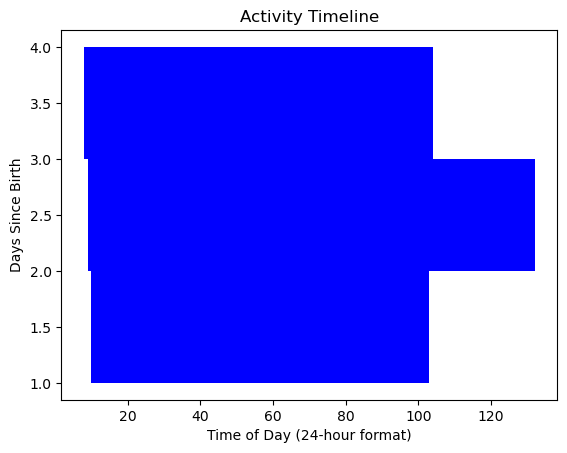

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Generate some sample data
data = {
    'days_since_birth': [1, 1, 1, 2, 2, 2, 3, 3, 3],
    'time_24_hour': ['10:00:00', '13:00:00', '16:00:00', '09:00:00', '12:00:00', '15:00:00', '08:00:00', '11:00:00', '14:00:00'],
    'duration': [40, 90, 60, 50, 120, 60, 30, 60, 90]
}

df = pd.DataFrame(data)

fig, ax = plt.subplots()

for index, row in df.iterrows():
    x = pd.to_datetime(row['time_24_hour']).hour
    y = row['days_since_birth']
    duration = row['duration']

    ax.broken_barh([(x, duration)], (y, 1), facecolors='blue')

ax.set_xlabel('Time of Day (24-hour format)')
ax.set_ylabel('Days Since Birth')
ax.set_title('Activity Timeline')

plt.show()

In [10]:
import pandas as pd
ember_sleep_df = pd.read_csv('data/ember_sleep_30march_updated.csv')
ember_sleep_df.head()

,raw_time,sleep_date,days_since_birth,months_since_birth,last_sleep_end,nap_time,wake_time,duration,hours_duration,hour_of_day,sleep_day,sleep_month,sleep_year,wake_window,wake_window_hours,night_sleep,nap_num,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,9/13/23 3:38 AM,13/09/2023,26,0,NaN,3:38,5:30,112,1.87,3,13,9,2023,NaN,NaN,False,0,NaN,NaN,NaN
1,9/13/23 9:29 AM,13/09/2023,26,0,5:30,9:29,11:00,91,1.52,9,13,9,2023,239.0,3.983333,False,1,NaN,NaN,NaN
2,9/13/23 12:15 PM,13/09/2023,26,0,11:00,12:15,13:26,71,1.18,12,13,9,2023,75.0,1.250000,False,2,NaN,NaN,NaN
3,9/13/23 2:12 PM,13/09/2023,26,0,13:26,14:12,15:37,85,1.42,14,13,9,2023,46.0,0.766667,False,3,NaN,NaN,NaN
4,9/13/23 5:14 PM,13/09/2023,26,0,15:37,17:14,18:24,70,1.17,17,13,9,2023,97.0,1.616667,False,4,NaN,NaN,NaN


In [60]:
small_sleep_df['datetime_time'] = pd.to_datetime(ember_sleep_df['raw_time'], format='mixed')#'%m/%d/%y %I:%M %p')

In [24]:
ember_sleep_df['datetime_time'].head()

0   2023-09-13 03:38:00
1   2023-09-13 09:29:00
2   2023-09-13 12:15:00
3   2023-09-13 14:12:00
4   2023-09-13 17:14:00
Name: datetime_time, dtype: datetime64[ns]

In [70]:
small_sleep_df = ember_sleep_df[['raw_time','sleep_date','days_since_birth','nap_time','wake_time']]
small_sleep_df['datetime_raw_time'] = pd.to_datetime(ember_sleep_df['raw_time'], format='mixed')#'%m/%d/%y %I:%M %p')
small_sleep_df['nap_time_formatted'] = pd.to_datetime(small_sleep_df['nap_time'], format='%H:%M')
small_sleep_df['wake_time_formatted'] = pd.to_datetime(small_sleep_df['wake_time'], format='%H:%M')
small_sleep_df['timestamp_hour'] = (
    small_sleep_df["nap_time_formatted"].dt.hour + small_sleep_df["nap_time_formatted"].dt.minute / 60
)
small_sleep_df['Date'] = ember_sleep_df['datetime_time'].dt.date
small_sleep_df['day_number']  = small_sleep_df['days_since_birth']
small_sleep_df.head()

C:\Users\lets_\AppData\Local\Temp\ipykernel_90556\513100580.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_sleep_df['datetime_raw_time'] = pd.to_datetime(ember_sleep_df['raw_time'], format='mixed')#'%m/%d/%y %I:%M %p')
C:\Users\lets_\AppData\Local\Temp\ipykernel_90556\513100580.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_sleep_df['nap_time_formatted'] = pd.to_datetime(small_sleep_df['nap_time'], format='%H:%M')
C:\Users\lets_\AppData\Local\Temp\ipykernel_90556\513100580.py:4: Settin

,raw_time,sleep_date,days_since_birth,nap_time,wake_time,datetime_raw_time,nap_time_formatted,wake_time_formatted,timestamp_hour,Date,day_number
0,9/13/23 3:38 AM,13/09/2023,26,3:38,5:30,2023-09-13 03:38:00,1900-01-01 03:38:00,1900-01-01 05:30:00,3.633333,2023-09-13,26
1,9/13/23 9:29 AM,13/09/2023,26,9:29,11:00,2023-09-13 09:29:00,1900-01-01 09:29:00,1900-01-01 11:00:00,9.483333,2023-09-13,26
2,9/13/23 12:15 PM,13/09/2023,26,12:15,13:26,2023-09-13 12:15:00,1900-01-01 12:15:00,1900-01-01 13:26:00,12.250000,2023-09-13,26
3,9/13/23 2:12 PM,13/09/2023,26,14:12,15:37,2023-09-13 14:12:00,1900-01-01 14:12:00,1900-01-01 15:37:00,14.200000,2023-09-13,26
4,9/13/23 5:14 PM,13/09/2023,26,17:14,18:24,2023-09-13 17:14:00,1900-01-01 17:14:00,1900-01-01 18:24:00,17.233333,2023-09-13,26


In [72]:
data

,raw_time,sleep_date,days_since_birth,nap_time,wake_time,datetime_raw_time,nap_time_formatted,wake_time_formatted,timestamp_hour,Date,day_number,end_timestamp_hour,duration
0,9/13/23 3:38 AM,13/09/2023,26,3:38,5:30,2023-09-13 03:38:00,1900-01-01 03:38:00,1900-01-01 05:30:00,3.633333,2023-09-13,26,5.500000,1.866667
1,9/13/23 9:29 AM,13/09/2023,26,9:29,11:00,2023-09-13 09:29:00,1900-01-01 09:29:00,1900-01-01 11:00:00,9.483333,2023-09-13,26,11.000000,1.516667
2,9/13/23 12:15 PM,13/09/2023,26,12:15,13:26,2023-09-13 12:15:00,1900-01-01 12:15:00,1900-01-01 13:26:00,12.250000,2023-09-13,26,13.433333,1.183333
3,9/13/23 2:12 PM,13/09/2023,26,14:12,15:37,2023-09-13 14:12:00,1900-01-01 14:12:00,1900-01-01 15:37:00,14.200000,2023-09-13,26,15.616667,1.416667
4,9/13/23 5:14 PM,13/09/2023,26,17:14,18:24,2023-09-13 17:14:00,1900-01-01 17:14:00,1900-01-01 18:24:00,17.233333,2023-09-13,26,18.400000,1.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209,3/22/24 8:15 PM,22/03/2024,217,20:15,6:58,2024-03-22 20:15:00,1900-01-01 20:15:00,1900-01-01 06:58:00,20.250000,2024-03-22,217,6.966667,-13.283333
1210,3/23/24 7:27 AM,23/03/2024,218,7:27,8:35,2024-03-23 07:27:00,1900-01-01 07:27:00,1900-01-01 08:35:00,7.450000,2024-03-23,218,8.583333,1.133333
1211,3/23/24 10:35 AM,23/03/2024,218,10:35,11:55,2024-03-23 10:35:00,1900-01-01 10:35:00,1900-01-01 11:55:00,10.583333,2024-03-23,218,11.916667,1.333333
1212,3/23/24 3:37 PM,23/03/2024,218,15:37,16:51,2024-03-23 15:37:00,1900-01-01 15:37:00,1900-01-01 16:51:00,15.616667,2024-03-23,218,16.850000,1.233333


C:\Users\lets_\AppData\Local\Temp\ipykernel_90556\2629922237.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_sleep_df['datetime_raw_time'] = pd.to_datetime(ember_sleep_df['raw_time'], format='mixed')#'%m/%d/%y %I:%M %p')
C:\Users\lets_\AppData\Local\Temp\ipykernel_90556\2629922237.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_sleep_df['nap_time_formatted'] = pd.to_datetime(small_sleep_df['nap_time'], format='%H:%M')
C:\Users\lets_\AppData\Local\Temp\ipykernel_90556\2629922237.py:10: Se

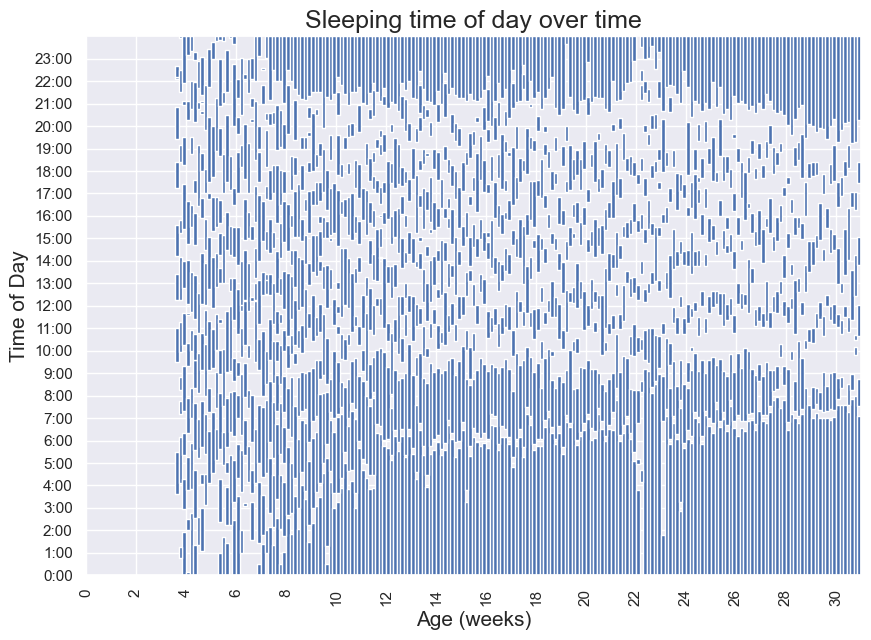

In [93]:
import datetime as dt
import seaborn as sns
import matplotlib as mpl
import numpy as np
import math

small_sleep_df = ember_sleep_df[['raw_time','sleep_date','days_since_birth','nap_time','wake_time']]
small_sleep_df['datetime_raw_time'] = pd.to_datetime(ember_sleep_df['raw_time'], format='mixed')#'%m/%d/%y %I:%M %p')
small_sleep_df['nap_time_formatted'] = pd.to_datetime(small_sleep_df['nap_time'], format='%H:%M')
small_sleep_df['wake_time_formatted'] = pd.to_datetime(small_sleep_df['wake_time'], format='%H:%M')
small_sleep_df['timestamp_hour'] = (
    small_sleep_df["nap_time_formatted"].dt.hour + small_sleep_df["nap_time_formatted"].dt.minute / 60
)
small_sleep_df['Date'] = ember_sleep_df['datetime_time'].dt.date
small_sleep_df['day_number']  = small_sleep_df['days_since_birth']

# Import and extract sleep data
data = small_sleep_df

# Convert end time timestamp to decimal hours
data["end_timestamp_hour"] = (
    data["wake_time_formatted"].dt.hour + data["wake_time_formatted"].dt.minute / 60
)

# Compute duration in decimal hours
data["duration"] = data["end_timestamp_hour"] - data["timestamp_hour"]

# create end time column
data['End time'] = data['datetime_raw_time'] + pd.to_timedelta(data['duration'], unit='h')
# Update column z based on conditions
data['End time'] = data.apply(lambda row: row['End time'] + pd.Timedelta(days=1) if row['end_timestamp_hour'] < row['timestamp_hour'] else row['End time'], axis=1)

# Find the index of session that extend into the next day
index = data["End time"].dt.normalize() > data["Date"]

# Compute the offset duration to be plotted the next day
data.loc[index, "offset"] = data["end_timestamp_hour"]

# Compute the current day duration, cut off to midnight
data.loc[index, "duration"] = 24 - data["timestamp_hour"]

# Plot setup
sns.set(style="darkgrid")
figure = plt.figure(figsize=(10, 7))
fig_ax = figure.add_subplot(111)

BAR_SIZE = 1
AXIS_FONT_SIZE_LG = 15

# Find sessions with offsets and plot the offset with day_number+1
data.loc[index].apply(
    lambda row: fig_ax.broken_barh(
        [(row["day_number"] + 1, BAR_SIZE)],
        [0, row["offset"]],
    ),
    axis=1,
)
# Loop through each row and plot the duration
data.apply(
    lambda row: fig_ax.broken_barh(
        [(row["day_number"], BAR_SIZE)],
        [row["timestamp_hour"], row["duration"]],
    ),
    axis=1,
)

# End date - one year or full
end_date = data.iloc[-1]['day_number']

def enumerate_labels(date_num: int) -> tuple[pd.DataFrame, pd.DataFrame]:
    hour_labels = [f"{num}:00" for num in range(24)]
    week_labels = [str(num) for num in range(0, math.ceil(date_num / 7), 2)]

    return hour_labels, week_labels

def format_24h_week_plot_vertical(fig_axis: mpl.figure, date_num: int) -> None:
    # Create the tick labels
    hour_labels, week_labels = enumerate_labels(date_num)

    # Set title and axis labels
    fig_axis.set_xlabel(
        "Age (weeks)",
        fontsize=AXIS_FONT_SIZE_LG,
        rotation=0,
    )
    fig_axis.set_ylabel("Time of Day", fontsize=AXIS_FONT_SIZE_LG)

    # Format y axis - clock time
    fig_axis.set_ylim(24, 0)
    fig_axis.yaxis.set_ticks(np.arange(0, 24, 1))
    fig_axis.set_yticklabels(hour_labels, rotation=0)
    fig_axis.invert_yaxis()
    fig_axis.set_title("Sleeping time of day over time",fontsize=18)

    # Format x axis - bottom, week number
    fig_axis.set_xlim(1, date_num)
    fig_axis.xaxis.set_ticks(np.arange(1, date_num + 1, 14))
    fig_axis.set_xticklabels(week_labels, rotation=90)

# Format plot - vertical or horizontal
format_24h_week_plot_vertical(fig_ax, end_date)


C:\Users\lets_\AppData\Local\Temp\ipykernel_90556\611447981.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_sleep_df['datetime_raw_time'] = pd.to_datetime(ember_sleep_df['raw_time'], format='mixed')#'%m/%d/%y %I:%M %p')
C:\Users\lets_\AppData\Local\Temp\ipykernel_90556\611447981.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_sleep_df['nap_time_formatted'] = pd.to_datetime(small_sleep_df['nap_time'], format='%H:%M')
C:\Users\lets_\AppData\Local\Temp\ipykernel_90556\611447981.py:11: Sett

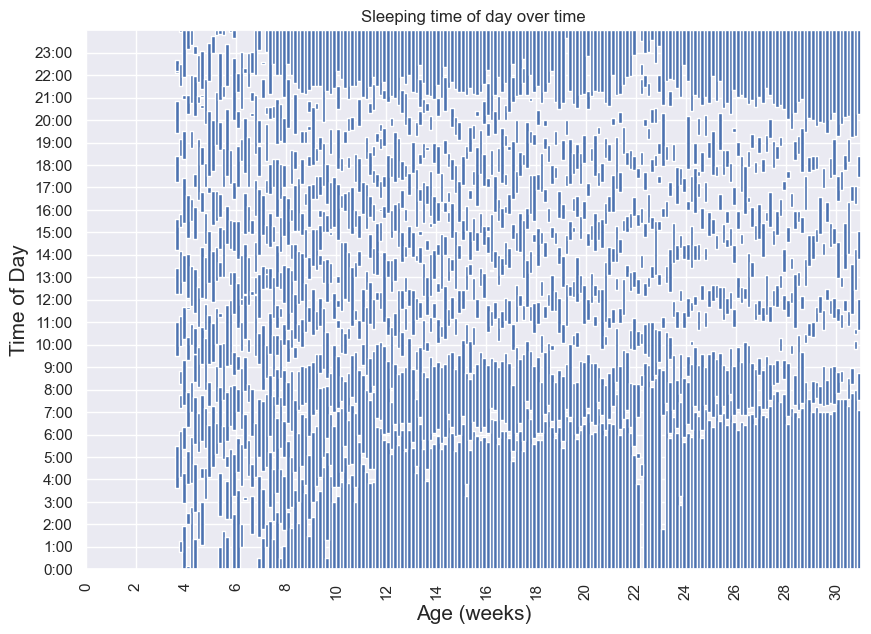

In [92]:
import datetime as dt
import seaborn as sns
import matplotlib as mpl
import numpy as np
import math


small_sleep_df = ember_sleep_df[['raw_time','sleep_date','days_since_birth','nap_time','wake_time']]
small_sleep_df['datetime_raw_time'] = pd.to_datetime(ember_sleep_df['raw_time'], format='mixed')#'%m/%d/%y %I:%M %p')
small_sleep_df['nap_time_formatted'] = pd.to_datetime(small_sleep_df['nap_time'], format='%H:%M')
small_sleep_df['wake_time_formatted'] = pd.to_datetime(small_sleep_df['wake_time'], format='%H:%M')
small_sleep_df['timestamp_hour'] = (
    small_sleep_df["nap_time_formatted"].dt.hour + small_sleep_df["nap_time_formatted"].dt.minute / 60
)
small_sleep_df['Date'] = ember_sleep_df['datetime_time'].dt.date
small_sleep_df['day_number']  = small_sleep_df['days_since_birth']

# Import and extract sleep data
data = small_sleep_df

# Convert end time timestamp to decimal hours
small_sleep_df["end_timestamp_hour"] = (
    small_sleep_df["wake_time_formatted"].dt.hour + small_sleep_df["wake_time_formatted"].dt.minute / 60
)

# Compute duration in decimal hours
small_sleep_df["duration"] = small_sleep_df["end_timestamp_hour"] - small_sleep_df["timestamp_hour"]

# create end time column
small_sleep_df['End time'] = small_sleep_df['datetime_raw_time'] + pd.to_timedelta(small_sleep_df['duration'], unit='h')
# Update column z based on conditions
small_sleep_df['End time'] = small_sleep_df.apply(lambda row: row['End time'] + pd.Timedelta(days=1) if row['end_timestamp_hour'] < row['timestamp_hour'] else row['End time'], axis=1)

# Find the index of session that extend into the next day
index = small_sleep_df["End time"].dt.normalize() > small_sleep_df["Date"]

# Compute the offset duration to be plotted the next day
small_sleep_df.loc[index, "offset"] = small_sleep_df["end_timestamp_hour"]

# Compute the current day duration, cut off to midnight
small_sleep_df.loc[index, "duration"] = 24 - small_sleep_df["timestamp_hour"]

def enumerate_labels(date_num: int) -> tuple[pd.DataFrame, pd.DataFrame]:
    hour_labels = [f"{num}:00" for num in range(24)]
    week_labels = [str(num) for num in range(0, math.ceil(date_num / 7), 2)]

    return hour_labels, week_labels

def format_24h_week_plot_vertical(fig_axis: mpl.figure, date_num: int) -> None:
    # Create the tick labels
    hour_labels, week_labels = enumerate_labels(date_num)

    # Set title and axis labels
    fig_axis.set_xlabel(
        "Age (weeks)",
        fontsize=AXIS_FONT_SIZE_LG,
        rotation=0,
    )
    fig_axis.set_ylabel("Time of Day", fontsize=AXIS_FONT_SIZE_LG)

    # Format y axis - clock time
    fig_axis.set_ylim(24, 0)
    fig_axis.yaxis.set_ticks(np.arange(0, 24, 1))
    fig_axis.set_yticklabels(hour_labels, rotation=0)
    fig_axis.invert_yaxis()
    fig_axis.set_title("Sleeping time of day over time")

    # Format x axis - bottom, week number
    fig_axis.set_xlim(1, date_num)
    fig_axis.xaxis.set_ticks(np.arange(1, date_num + 1, 14))
    fig_axis.set_xticklabels(week_labels, rotation=90)

def create_24_hour_sleep_plot(data):
    # Plot setup
    sns.set(style="darkgrid")
    figure = plt.figure(figsize=(10, 7))
    fig_ax = figure.add_subplot(111)
    
    BAR_SIZE = 1
    AXIS_FONT_SIZE_LG = 15
    
    # Find sessions with offsets and plot the offset with day_number+1
    data.loc[index].apply(
        lambda row: fig_ax.broken_barh(
            [(row["day_number"] + 1, BAR_SIZE)],
            [0, row["offset"]],
        ),
        axis=1,
    )
    # Loop through each row and plot the duration
    data.apply(
        lambda row: fig_ax.broken_barh(
            [(row["day_number"], BAR_SIZE)],
            [row["timestamp_hour"], row["duration"]],
        ),
        axis=1,
    )
    
    # End date - one year or full
    end_date = data.iloc[-1]['day_number']
    # Format plot - vertical or horizontal
    format_24h_week_plot_vertical(fig_ax, end_date)


create_24_hour_sleep_plot(small_sleep_df)

In [23]:
import pandas as pd

# get feed data
ember_feed_df = pd.read_csv('data/ember_nursing_30march_updated.csv')
ember_feed_df['feed_date'] = pd.to_datetime(ember_feed_df['feed_date'])
feed_total_min = ember_feed_df[['days_since_birth', 'total_min']].groupby('days_since_birth').sum()
feed_total_min = feed_total_min.rename(columns={'total_min': 'total_mins'})
feed_mean_min = ember_feed_df[['days_since_birth', 'total_min']].groupby('days_since_birth').mean()
feed_mean_min = feed_mean_min.rename(columns={'total_min': 'average_mins'})
feed_count = ember_feed_df[['days_since_birth', 'total_min']].groupby('days_since_birth').count()
feed_count = feed_count.rename(columns={'total_min': 'num_feeds'})
feed_agg_df = pd.merge(feed_total_min, feed_mean_min, on='days_since_birth', how='inner').merge(feed_count, on='days_since_birth', how='inner')
feed_agg_df = feed_agg_df.reset_index()

# load sleep data
ember_sleep_df = pd.read_csv('data/ember_sleep_30march_updated.csv')
ember_sleep_df['duration'] = ember_sleep_df['hours_duration'].astype(float)
sleep_total_duration = ember_sleep_df[['days_since_birth', 'duration']].groupby('days_since_birth').sum()/60
sleep_total_duration = sleep_total_duration.rename(columns={'duration': 'duration_hours'})
nap_duration = ember_sleep_df[ember_sleep_df['night_sleep'] == False][['days_since_birth', 'duration']].groupby('days_since_birth').mean()
nap_duration = nap_duration.rename(columns={'duration': 'nap_duration_mins'})
nap_count = ember_sleep_df[ember_sleep_df['night_sleep'] == False][['days_since_birth', 'duration']].groupby('days_since_birth').count()
nap_count = nap_count.rename(columns={'duration': 'nap_count'})
sleep_agg_df = pd.merge(sleep_total_duration, nap_duration, on='days_since_birth', how='inner').merge(nap_count, on='days_since_birth', how='inner')
sleep_agg_df = sleep_agg_df.reset_index()

# Join the two tables on the column 'days_since_birth'
ember_day_df = pd.merge(sleep_agg_df, feed_agg_df, on='days_since_birth', how='inner')
ember_day_df.head()


C:\Users\lets_\AppData\Local\Temp\ipykernel_23712\1052183648.py:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  ember_feed_df['feed_date'] = pd.to_datetime(ember_feed_df['feed_date'])


,days_since_birth,duration_hours,nap_duration_mins,nap_count,total_mins,average_mins,num_feeds
0,26,0.152167,1.141250,8,259,18.500000,14
1,27,0.187500,1.096250,8,317,21.133333,15
2,28,0.211167,1.407778,9,261,26.100000,10
3,29,0.216167,1.558750,8,295,19.666667,15
4,30,0.184833,1.294286,7,259,23.545455,11
